In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("kddcup.data_10_percent_corrected",names =feature_names)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
def classify(df,attack_types):
    attack_type=[]
    for i in df['attack_types']:
        if i == 'normal.':
            attack_type.append('Normal')
        elif i in R2L:
            attack_type.append('R2L')
        elif i in U2R:
            attack_type.append('U2R')
        elif i in DoS:
            attack_type.append('DoS')
        else:
            attack_type.append('Probe')
    return attack_type
df['label']=classify(df,'attack_types')

In [8]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


## Data Size

In [9]:
df.shape

(494021, 43)

## Remove redundant features from dataset

In [10]:
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)

## Transform of categorical features

In [11]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [12]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


## Remove duplicates from dataframe

In [13]:
def remove_duplicate(df):
  print('Before remove duplicate shape',df.shape)
  df.drop_duplicates(subset=None, keep='first', inplace=True)
  print('After remove duplicate shape',df.shape)
  return df

In [14]:
df = remove_duplicate(df)

Before remove duplicate shape (494021, 41)
After remove duplicate shape (145586, 41)


In [15]:
df.shape

(145586, 41)

In [16]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

## Check lablel of dataset 

In [17]:
df['label'].value_counts()

Normal    87832
DoS       54572
Probe      2131
R2L         999
U2R          52
Name: label, dtype: int64

In [18]:
df['attack_types'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack_types, dtype: int64

# Exploratory data analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

## Distribution of attacks

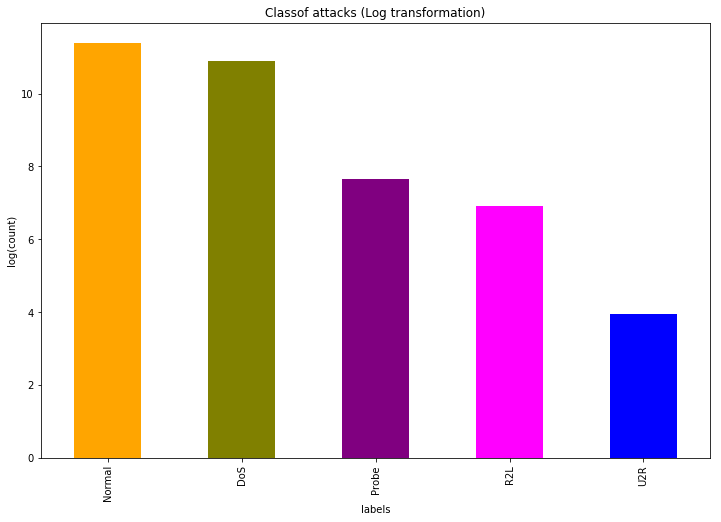

In [20]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks (Log transformation)')
df['label'].value_counts().apply(np.log).plot(kind='bar', color = ['orange','Olive','purple','Fuchsia','blue'])
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

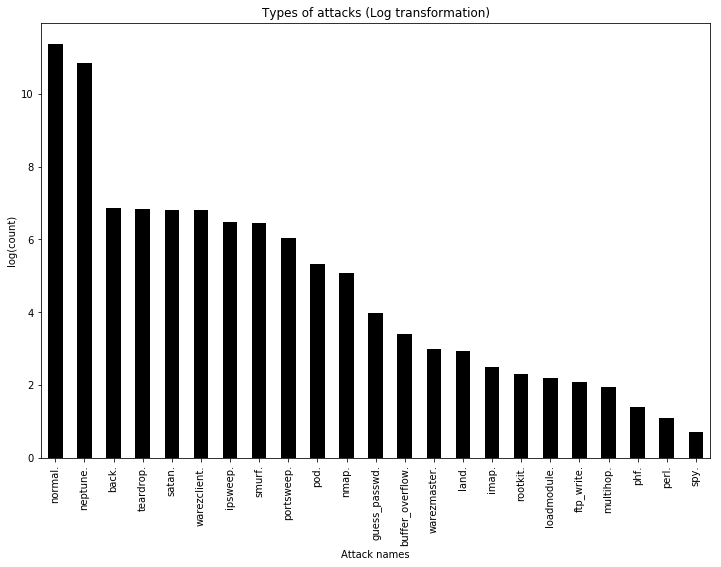

In [21]:
plt.figure(figsize=(12,8))
plt.title("Types of attacks (Log transformation)")
df['attack_types'].value_counts().apply(np.log).plot(kind='bar',color = "black")
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [22]:
df.dtypes

duration                         int64
protocol_type                     int8
service                           int8
flag                              int8
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [23]:
def target_feature(mydf):
  target = df['label'] 
  return target

In [24]:
y= target_feature(df)
y.shape

(145586,)

In [28]:
X= df.drop(columns=['attack_types','label'])

In [29]:
X.shape

(145586, 39)

## Split test data into 6 subset

In [30]:
def subset_data(Data, subset):
    split = len(Data) / float(subset)
    mydata = []
    last = 0.0

    while last < len(Data):
       mydata.append(Data[int(last):int(last + split)])
       last += split
    return mydata

In [58]:
data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape, data7.shape

((11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39))

# =========================== SVM Model ========================

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [33]:
def SVM_model(X_train,y_train,X_test,data_type = 'traing set',expert = 5,no =1):
  clf = SVC(kernel ='rbf',C = expert,gamma= 'auto')
  m = OneVsRestClassifier(clf)
  train=m.fit(X_train,y_train)

In [34]:
X_train,y_train = X,y

In [35]:
def prediction_score(y_true, y_Pred, data_name = 'test set'):
  col_name =['Dos','Normal', 'Probe', 'R2L','U2R']
  score = list()
  for i in y_Pred:
    score.append(accuracy_score(y_true[i],y_Pred[i]))
  mydict = {'Dos':score[0]*100,'Normal':score[1]*100,'Probe':score[2]*100,
          'R2L':score[3]*100,'U2R':score[4]*100}
  print("Classification accuracy score on the " + str(data_name)+ "\n")
  return mydict

## ======================== Avg prediction score =========================





In [36]:
def all_prediction_score_avg(all_score):
  score = list()
  
  a1 = np.array(list(all_score[0].values()))
  a2 = np.array(list(all_score[1].values()))
  a3 = np.array(list(all_score[2].values()))
  a4 = np.array(list(all_score[3].values()))
  a5 = np.array(list(all_score[4].values()))
  a6 = np.array(list(all_score[5].values()))
  myresult = (a1+a2+a3+a4+a5+a6)/6
  for i in myresult:
    score.append(i)
  mydict = {'Dos':score[0],'Normal':score[1],'Probe':score[2],
        'R2L':score[3],'U2R':score[4]}
  return mydict

In [ ]:
result_dict = all_prediction_score_avg(all_score)

In [0]:
result_dict

{'Dos': 97.48417208420112,
 'Normal': 96.50131540190254,
 'Probe': 98.49452050500769,
 'R2L': 98.9249876038049,
 'U2R': 99.85318480519489}

In [0]:
Accuracy = np.array(Score).mean()
print("SVM model acuuracy: {}%". format(float(round(Accuracy*100))))

SVM model acuuracy: 97.0%
